# ERA 5 data with NAO

### Raw, and 25mb interpolated, all .nc (open in xarray)

In [102]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy.stats

In [104]:
ds = xr.open_dataset('~/Box/Patrick/ERA5/caribbean_sst.nc')

In [106]:
df=pd.read_csv('~/Box/Patrick/ERA5/nao.csv')

In [108]:
df.head

<bound method NDFrame.head of      year  month  nao_index
0    1979      1     -1.380
1    1979      2     -0.670
2    1979      3      0.780
3    1979      4     -1.710
4    1979      5     -1.030
..    ...    ...        ...
510  2021      7      0.026
511  2021      8     -0.283
512  2021      9     -0.214
513  2021     10     -2.290
514  2021     11     -0.185

[515 rows x 3 columns]>

In [110]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 201, latitude: 141, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
Data variables:
    sst        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-18 23:23:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [112]:
corr_matrix = np.array([[0]*201]*141)
p_values = np.array([[0]*201]*141)

In [114]:
if np.nan in np.array(ds.sst[400:516,0,60,70]):
    print('yes')
else:
    print('no')

print(ds.sst[515,0,60,70])

no
<xarray.DataArray 'sst' ()>
array(nan, dtype=float32)
Coordinates:
    longitude  float32 -82.5
    latitude   float32 25.0
    expver     int32 1
    time       datetime64[ns] 2021-12-01
Attributes:
    units:      K
    long_name:  Sea surface temperature


In [116]:
print(np.array(ds.sst[400:516,0,60,70]))

[300.21063 301.60455 302.25473 303.08142 302.0151  300.91116 297.27374
 296.6872  296.26392 295.75314 294.80945 296.8749  299.41193 301.46976
 302.0039  302.76245 302.5808  301.81824 299.1708  297.59222 295.7079
 296.20135 296.78232 297.58154 299.73703 301.59897 303.2605  303.97424
 303.03003 301.75058 298.4016  295.8493  295.32886 294.04535 296.96545
 299.05276 300.42685 302.10464 303.2854  303.83636 303.49704 301.80093
 300.28644 298.28815 296.47556 294.80487 296.1103  297.4101  299.66428
 301.88232 303.2203  303.1557  302.86877 301.1116  298.04446 297.23306
 295.7664  295.1961  295.802   297.59833 299.87335 301.61575 302.98016
 303.553   302.96594 301.57608 298.94138 297.31393 294.6543  295.2149
 296.50912 297.6843  298.65646 301.40005 303.21164 303.05444 302.76245
 301.5242  299.35037 296.9965  296.02634 296.19016 297.98648 298.5191
 300.3938  302.63373 303.30017 303.65018 303.0987  301.9373  300.4467
 298.02972 296.08127 295.39603 296.3575  299.54675 299.9634  302.0482
 303.14145 

In [118]:
corr_df = pd.DataFrame({'nao':df.nao_index,'sst':np.array(ds.sst[0:515,0,50,60])})
rat = 5
print(rat)

5


In [ ]:
for ilon in range(201):
    for ilat in range(141):
        corr_df = pd.DataFrame({'nao':df.nao_index,'sst':np.array(ds.sst[0:515,0,ilat,ilon])})
        print(corr_df)

In [71]:
for ilon in range(201):
    for ilat in range(141):
        
        corr_matrix[ilat][ilon]=scipy.stats.pearsonr(ds.sst[0:515,0,ilat,ilon],df.nao_index)[0]
            #p_values[ilat][ilon]=scipy.stats.pearsonr(ds.sst[0:515,0,ilat,ilon],df.nao_index)[1]
        #corr_matrix[ilat][ilon]=np.corrcoef(ds.sst[0:515,0,ilat,ilon],df.nao_index)[0][1]

ValueError: array must not contain infs or NaNs

In [108]:
print(np.nanmax(corr_matrix))

0.09880731342797502


mix

In [101]:
test=np.corrcoef(ds.sst[0:515,0,46,60],df.nao_index)
test[0][1]

-0.20859735649111266

In [25]:
sst

array([[[[      nan,       nan,       nan, ..., 290.77472, 290.7737 ,
          290.7559 ],
         [      nan,       nan,       nan, ..., 291.0062 , 290.97668,
          290.95123],
         [      nan,       nan,       nan, ..., 291.2524 , 291.20053,
          291.1878 ],
         ...,
         [299.8301 , 299.86572, 299.88913, ..., 300.09772, 300.14502,
          300.16995],
         [299.85098, 299.88403, 299.91455, ..., 300.0911 , 300.14297,
          300.1781 ],
         [299.87335, 299.90643, 299.90234, ..., 300.056  , 300.10077,
          300.13992]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,   

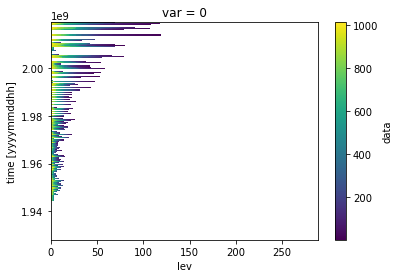

In [91]:
ds.data[:,:,0].plot() # 0 = pressure